# **1. About Dataset**

# General Info

**This is a set of just over 1,000 student data collected.**


# Columns Names

**gender**

**race/ethnicity**

**parental level of education**

**lunch**

**test preparation course**

**math score** 

**reading score**

**writing score**

# General purpose

**We'll try to analysis student's scores to know if there are features influence on student's performance or not..**

# **2. Data Understanding**

**Importing Packages**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**Explore Data before any change**

In [2]:
path = "D:\\WORK Space\\My Portfolio\\Students performance in Exams\\Data\\StudentsPerformance.csv"
df = pd.read_csv(path)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


**Adding total score (%) = (math score + reading score + writing score) / 3**

In [3]:
df['total score (%)'] = round((df['math score']+df['reading score']+df['writing score']) / 3, 1)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score (%)
0,female,group B,bachelor's degree,standard,none,72,72,74,72.7
1,female,group C,some college,standard,completed,69,90,88,82.3
2,female,group B,master's degree,standard,none,90,95,93,92.7
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.3
4,male,group C,some college,standard,none,76,78,75,76.3


**Data Information**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   total score (%)              1000 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


**Summary Statistics**

In [5]:
df.describe().T[["min","mean","75%","max"]]\
.rename(columns={"min": "minimum_score",
                "mean": "average_score",
                 "75%":"75% of scores less",
                "max": "maximum_score"}).astype(int)

,minimum_score,average_score,75% of scores less,maximum_score
math score,0,66,77,100
reading score,17,69,79,100
writing score,10,68,79,100
total score (%),9,67,77,100


# **3. Exploratory Data Analysis**

**Count plot of males and females**

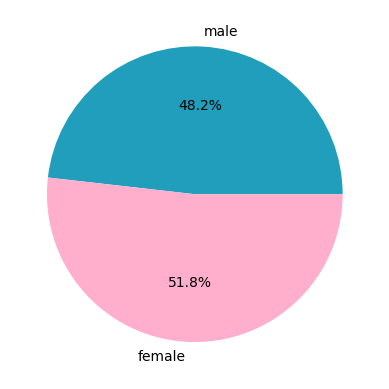

In [6]:
num_gender = [df.loc[df["gender"]=="male","gender"].count(), df.loc[df["gender"]=="female","gender"].count()]
laby = ["male", "female"]
colours = ["#219ebc","#ffafcc"]
plt.pie(num_gender,data=df, labels = laby, colors=colours, autopct='%1.1f%%')
plt.show()

**Count plot of categorical features according to gender**

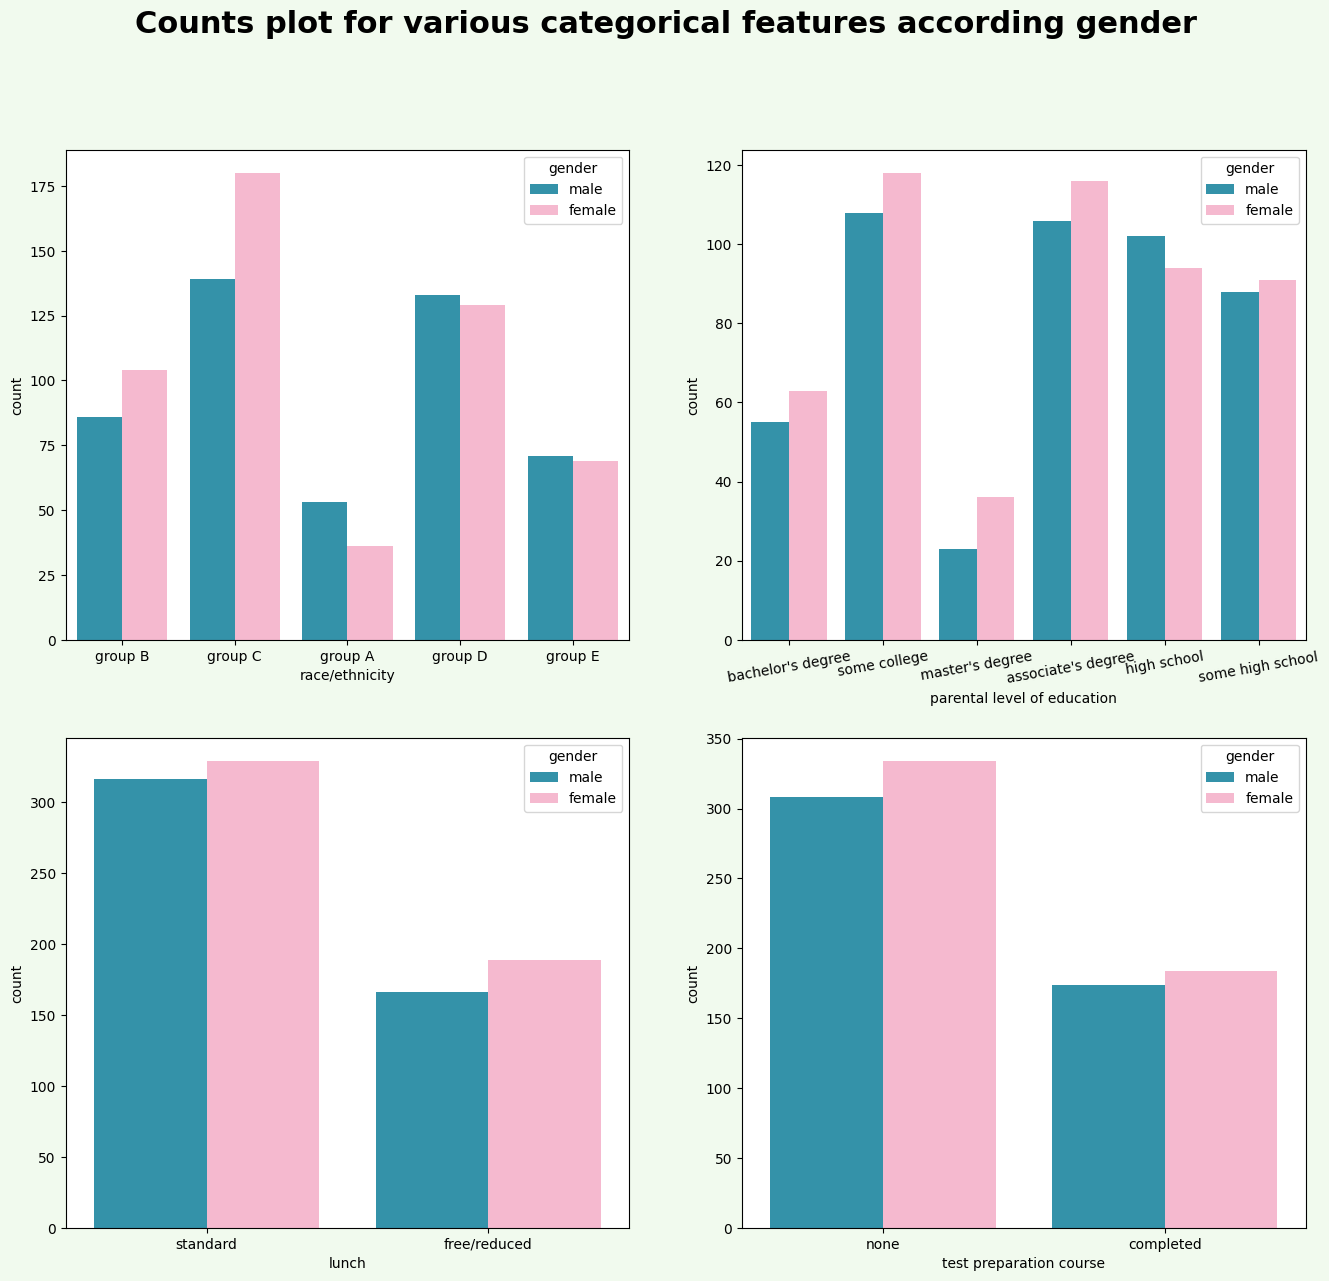

In [7]:
fig = plt.figure(figsize=(16,14), facecolor="#f1faee")
fig.suptitle(t='Counts plot for various categorical features according gender', 
             fontweight ="bold",
             fontsize=22)

gs  = fig.add_gridspec(2,2)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])

sns.countplot(x="race/ethnicity",
              hue="gender",
              hue_order=["male","female"],
              palette=colours,
              ax=ax1,
              data=df)

sns.countplot(x="parental level of education", 
              hue="gender",
              hue_order=["male","female"], 
              palette=colours,
              ax=ax2,
              data=df)

sns.countplot(x="lunch", 
              hue="gender", 
              hue_order=["male","female"], 
              palette=colours,
              ax=ax3, 
              data=df)

sns.countplot(x="test preparation course",
              hue="gender", 
              hue_order=["male","female"], 
              palette=colours,
              ax=ax4 ,
              data=df)

ax2.set_xticklabels(ax2.get_xticklabels(), rotation=10)
plt.show()

**Distribution of scores according to gender**

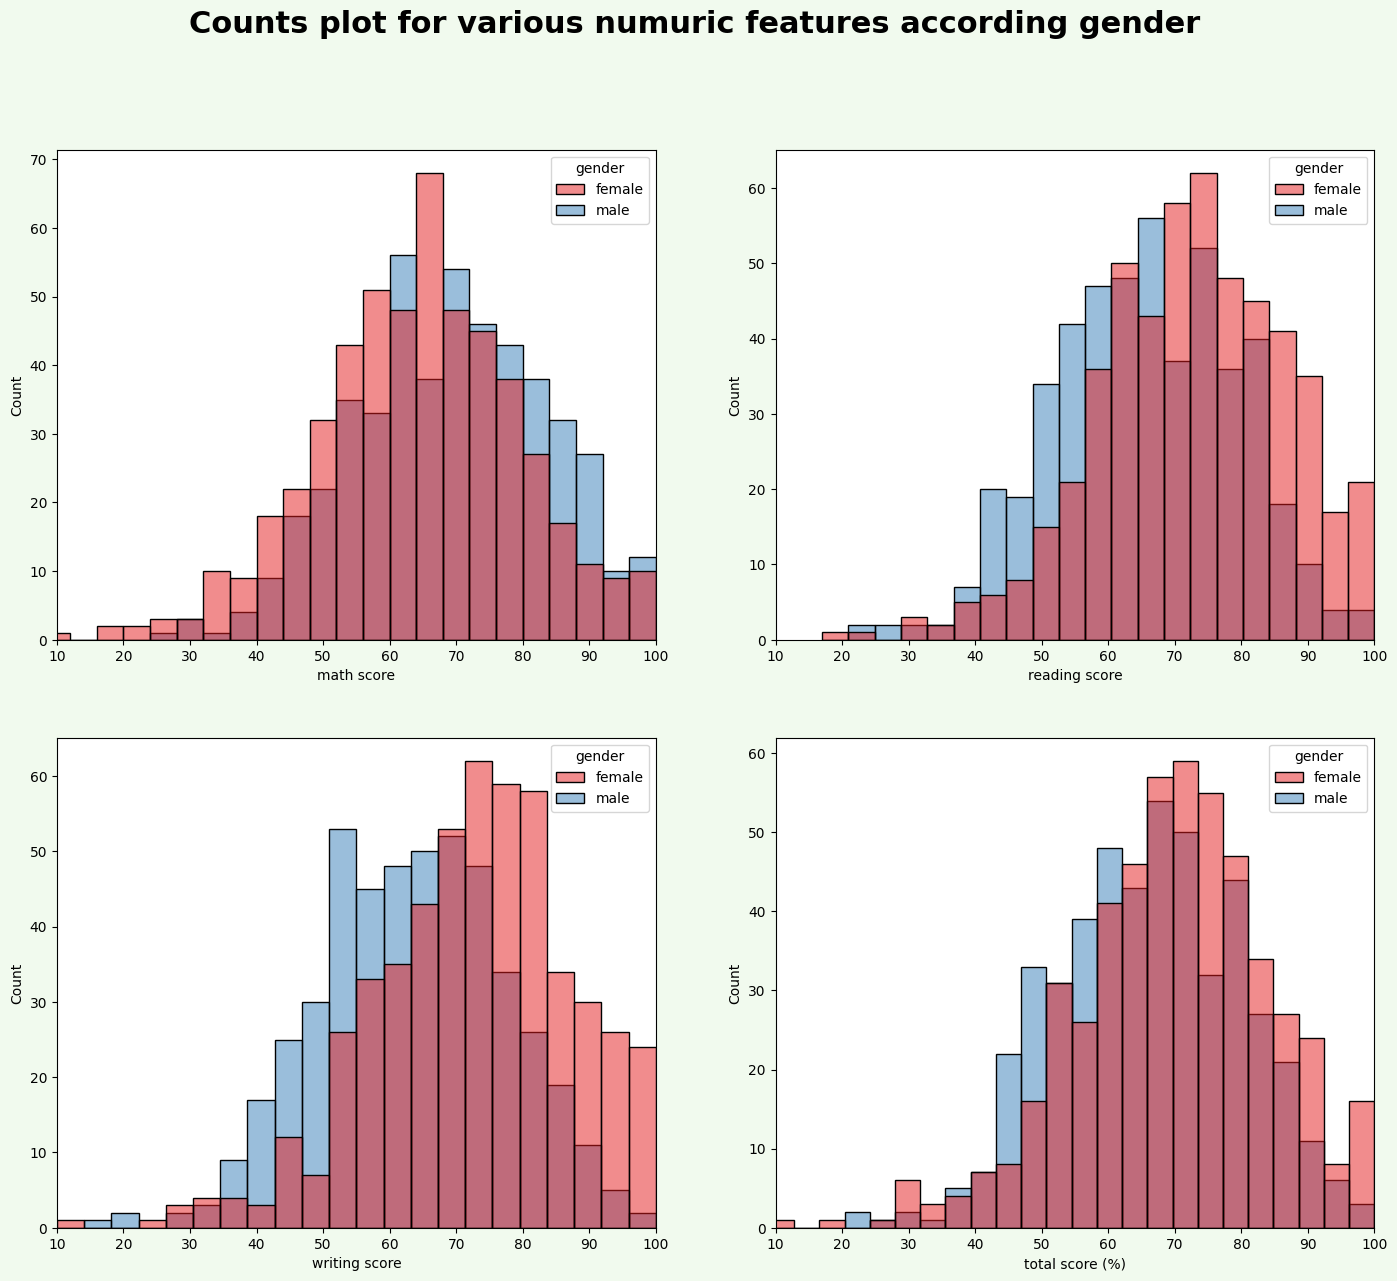

In [8]:
# gender
fig = plt.figure(figsize=(17,14), facecolor="#f1faee")
fig.suptitle(t='Counts plot for various numuric features according gender', 
             fontweight ="bold",
             fontsize=22)

gs  = fig.add_gridspec(2,2)
ax1 = fig.add_subplot(gs[0,0],xlim=(10,100))
ax2 = fig.add_subplot(gs[0,1],xlim=(10,100))
ax3 = fig.add_subplot(gs[1,0],xlim=(10,100))
ax4 = fig.add_subplot(gs[1,1],xlim=(10,100))

sns.histplot(data=df,x="math score",hue="gender",palette="Set1", ax=ax1)
sns.histplot(data=df, x="reading score",hue="gender",palette="Set1", ax=ax2)
sns.histplot(data=df, x="writing score",hue="gender",palette="Set1", ax=ax3)
sns.histplot(data=df, x="total score (%)",hue="gender",palette="Set1", ax=ax4)

plt.show()

**Relations found between high scores and various features**

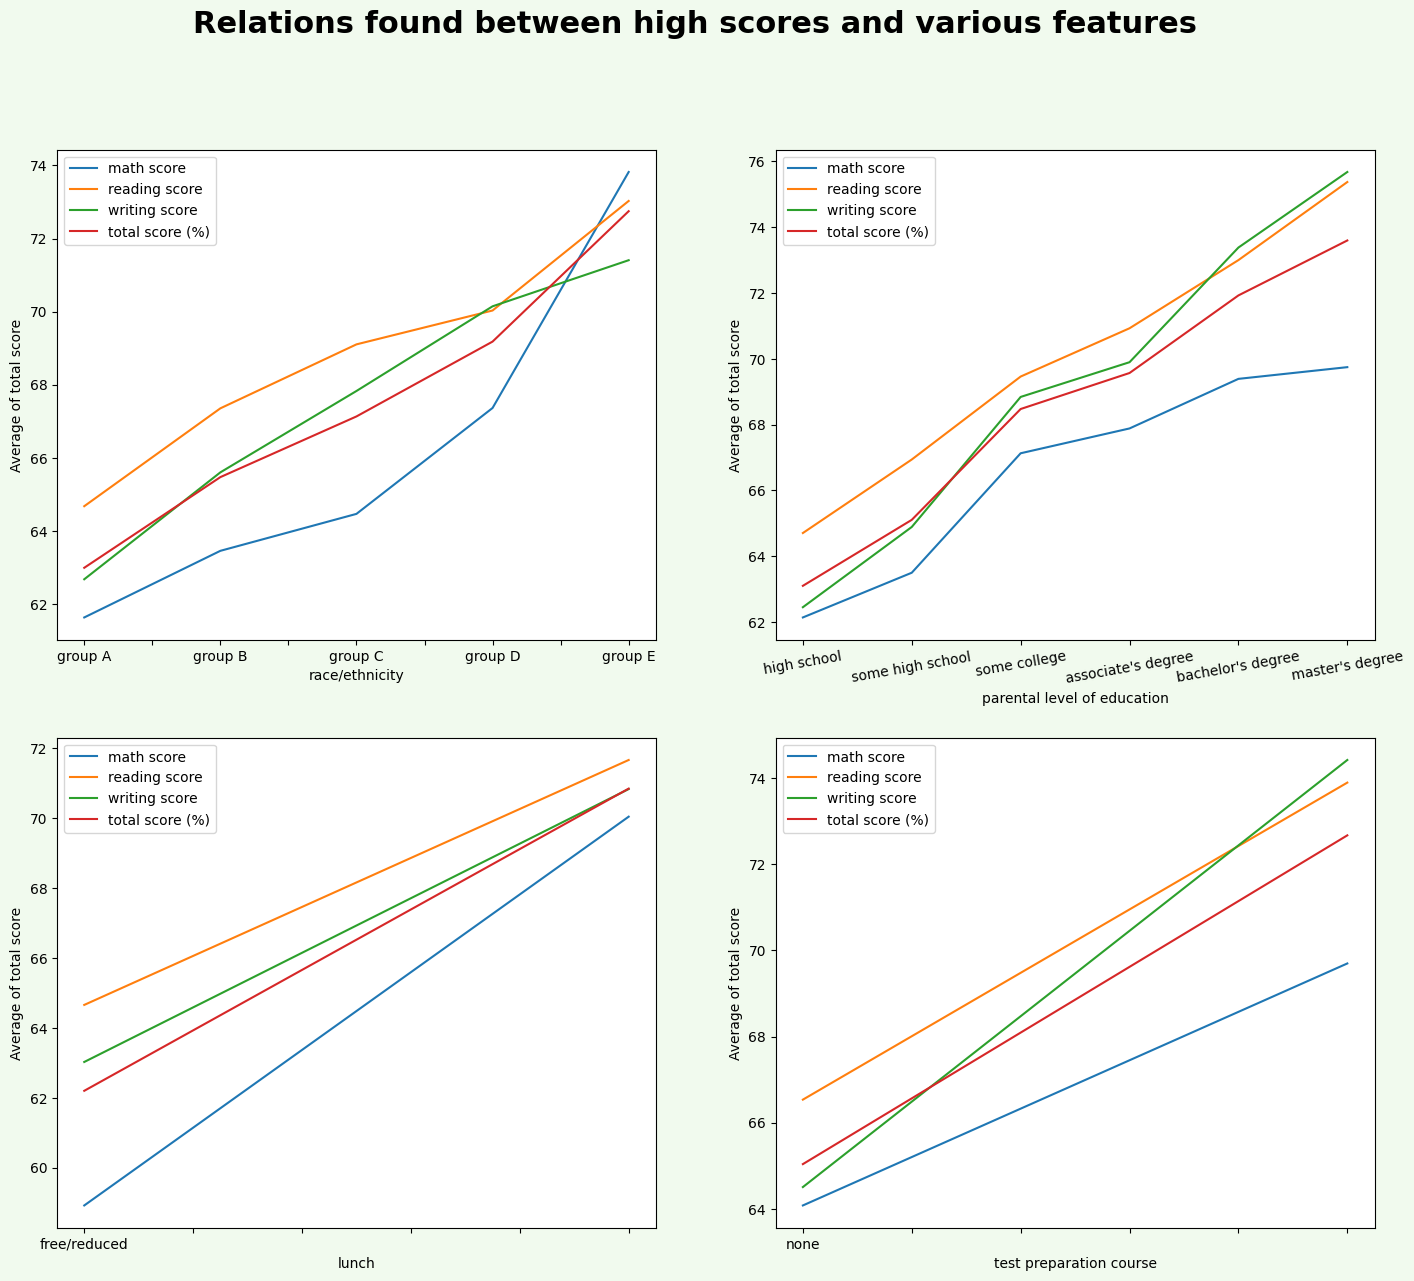

In [9]:
fig = plt.figure(figsize=(17,14), facecolor="#f1faee")
fig.suptitle(t='Relations found between high scores and various features', 
             fontweight ="bold",
             fontsize=22)

gs  = fig.add_gridspec(2,2)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])

ethnicity = df.groupby('race/ethnicity')[['math score','reading score','writing score','total score (%)']].mean().sort_values(by='total score (%)')
education = df.groupby('parental level of education')[['math score','reading score','writing score','total score (%)']].mean().sort_values(by='total score (%)')
lunch = df.groupby('lunch')[['math score','reading score','writing score','total score (%)']].mean().sort_values(by='total score (%)')
course = df.groupby('test preparation course')[['math score','reading score','writing score','total score (%)']].mean().sort_values(by='total score (%)')


ethnicity.plot(ylabel="Average of total score",ax=ax1)
education.plot(ylabel="Average of total score",ax=ax2)
lunch.plot(ylabel="Average of total score",ax=ax3)
course.plot(ylabel="Average of total score",ax=ax4)


ax2.set_xticklabels(ax2.get_xticklabels(), rotation=10)
plt.show()

> Now, We have finished, lets tackle some information.
> 
> First, We have 1000 Students in rows and 9 information in columns.
> 
> Average total scores of students = 67%.
> 
> 75% of students total scores are less than = 78%.
> 
> Average Math scores of Male is greater than Female,
> 
> Average Reading and Writing scores of Female is greater than Male,
> 
> when parental level of education is bachelor's degree or master's degree,
> their child get scores higher than others.
> 
> group E & D are higher average of others.
> 
> if student complete test preparation course, his chance to get high scores is bigger
> The test preparation course is important.
> 
> if student take lunch, his chance to get high scores is bigger
> 
> The lunch is important.

**If you like this notebook an upvote will be appreciated.**

**Thank you**